In [68]:
import os
import cv2
import zipfile
import random
import shutil

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from random import randint
from shutil import copyfile



In [69]:

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [70]:
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Dataset.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [71]:
len(os.listdir('/tmp/Dataset/'))

3

In [73]:
CLASSES, akik = [], [] # names of classes, count of images for each class

for root, dirs, files in os.walk('/tmp/Dataset'):
    f = os.path.basename(root)    # get class name - Amethyst, Onyx, etc    
        
    if len(files) > 0:
        akik.append(len(files))
        if f not in CLASSES:
            CLASSES.append(f) # add folder name
    
    # uncomment this block if you want a text output about each subfolder
    #count_dirs = 0
    #for f in dirs:           # count subfolders
        #count_dirs += 1
    #depth = root.split(os.sep)
    #print((len(depth) - 2) * '--'+'>', '{}:\t {} folders, {} imgs'.format(os.path.basename(root), count_dirs, gems[-1] if gems!=[] else 0)) 
    
akik_count = len(CLASSES) # 87 = number of classes
print('{} classes with {} images in total'.format(len(CLASSES), sum(akik)))

#f, ax = plt.subplots(figsize=(15,6))
#if(akik[0])<10:
#    plt.bar(range(akik_count), akik[akik_count:], label = 'Train data')
#    plt.bar(range(akik_count), akik[0:akik_count], label = 'Test data')
#else:
#    plt.bar(range(akik_count), akik[0:akik_count], label = 'Train data')
#    plt.bar(range(akik_count), akik[akik_count:], label = 'Test data')
#ax.grid()
#ax.legend(fontsize = 12);

3 classes with 120 images in total


In [74]:
source_path = '/tmp/Dataset'

source_path_bacan = os.path.join(source_path, 'Bacan')
source_path_merahdelima = os.path.join(source_path, 'Merah_Delima')
source_path_sungaidareh = os.path.join(source_path, 'Sungai_Dareh')



# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_bacan))} images of bacan.")
print(f"There are {len(os.listdir(source_path_merahdelima))} images of merah delima.")
print(f"There are {len(os.listdir(source_path_sungaidareh))} images of sungai dareh.")

There are 40 images of bacan.
There are 40 images of merah delima.
There are 40 images of sungai dareh.


In [75]:
# Define root directory
root_dir = '/tmp/batuakik'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# Create_train_test_dirs
def create_train_test_dirs(root_path):
  # HINT:
  # Use os.makedirs to create your directories with intermediate subdirectories
  # Don't hardcode the paths. Use os.path.join to append the new directories to the root_path parameter

  # CREATE TRAINING & TESTING PATH
  training_path = os.path.join(root_path, "training")
  os.makedirs(training_path)

  testing_path = os.path.join(root_path, "testing")
  os.makedirs(testing_path)

  # CREATE TRAINING PATH FOR EACH CLASSES
  training_bacan = os.path.join(training_path, "bacan")
  os.makedirs(training_bacan)
  training_merah_delima = os.path.join(training_path, "merah_delima")
  os.makedirs(training_merah_delima)
  training_sungai_dareh = os.path.join(training_path, "sungai_dareh")
  os.makedirs(training_sungai_dareh)

  # CREATE TESTING PATH FOR EACH CLASSES
  testing_bacan = os.path.join(testing_path, "bacan")
  os.makedirs(testing_bacan)
  testing_merah_delima = os.path.join(testing_path, "merah_delima")
  os.makedirs(testing_merah_delima)
  testing_sungai_dareh = os.path.join(testing_path, "sungai_dareh")
  os.makedirs(testing_sungai_dareh)

  ### END CODE HERE

try:
  create_train_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")


In [76]:
# Test your create_train_test_dirs function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/batuakik/testing
/tmp/batuakik/training
/tmp/batuakik/testing/sungai_dareh
/tmp/batuakik/testing/merah_delima
/tmp/batuakik/testing/bacan
/tmp/batuakik/training/sungai_dareh
/tmp/batuakik/training/merah_delima
/tmp/batuakik/training/bacan


In [77]:
# GRADED FUNCTION: split_data
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

  ### START CODE HERE
  files = []
  for filename in os.listdir(SOURCE):
      file = SOURCE + filename
      if os.path.getsize(file) > 0:
          files.append(filename)
      else:
          print(filename + " is zero length, so ignoring.")

  training_length = int(len(files) * SPLIT_SIZE)
  testing_length = int(len(files) - training_length)
  shuffled_set = random.sample(files, len(files))
  training_set = shuffled_set[0:training_length]
  testing_set = shuffled_set[-testing_length:]

  for filename in training_set:
      this_file = SOURCE + filename
      destination = TRAINING + filename
      copyfile(this_file, destination)

  for filename in testing_set:
      this_file = SOURCE + filename
      destination = TESTING + filename
      copyfile(this_file, destination)


  ### END CODE HERE

In [78]:
# Test your split_data function

# Define paths
BACAN_SOURCE_DIR = "/tmp/Dataset/Bacan/"
MERAHDELIMA_SOURCE_DIR = "/tmp/Dataset/Merah_Delima/"
SUNGAIDAREH_SOURCE_DIR = "/tmp/Dataset/Sungai_Dareh/"

TRAINING_DIR = "/tmp/batuakik/training/"
TESTING_DIR = "/tmp/batuakik/testing/"

TRAINING_BACAN_DIR = os.path.join(TRAINING_DIR, "bacan/")
TESTING_BACAN_DIR = os.path.join(TESTING_DIR, "bacan/")

TRAINING_MERAHDELIMA_DIR = os.path.join(TRAINING_DIR, "merah_delima/")
TESTING_MERAHDELIMA_DIR = os.path.join(TESTING_DIR, "merah_delima/")

TRAINING_SUNGAIDAREH_DIR = os.path.join(TRAINING_DIR, "sungai_dareh/")
TESTING_SUNGAIDAREH_DIR = os.path.join(TESTING_DIR, "sungai_dareh/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_BACAN_DIR)) > 0:
  for file in os.scandir(TRAINING_BACAN_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_MERAHDELIMA_DIR)) > 0:
  for file in os.scandir(TRAINING_MERAHDELIMA_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_SUNGAIDAREH_DIR)) > 0:
  for file in os.scandir(TRAINING_SUNGAIDAREH_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_BACAN_DIR)) > 0:
  for file in os.scandir(TESTING_BACAN_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_MERAHDELIMA_DIR)) > 0:
  for file in os.scandir(TESTING_MERAHDELIMA_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_SUNGAIDAREH_DIR)) > 0:
  for file in os.scandir(TESTING_SUNGAIDAREH_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(BACAN_SOURCE_DIR, TRAINING_BACAN_DIR, TESTING_BACAN_DIR, split_size)
split_data(MERAHDELIMA_SOURCE_DIR, TRAINING_MERAHDELIMA_DIR, TESTING_MERAHDELIMA_DIR, split_size)
split_data(SUNGAIDAREH_SOURCE_DIR, TRAINING_SUNGAIDAREH_DIR, TESTING_SUNGAIDAREH_DIR, split_size)

# Check that the number of images matches the expected output
print(f"\n\nThere are {len(os.listdir(TRAINING_BACAN_DIR))} images of bacan for training")
print(f"There are {len(os.listdir(TRAINING_MERAHDELIMA_DIR))} images of merah delima for training")
print(f"There are {len(os.listdir(TRAINING_SUNGAIDAREH_DIR))} images of sungai dareh for training")
print(f"There are {len(os.listdir(TESTING_BACAN_DIR))} images of bacan for testing")
print(f"There are {len(os.listdir(TESTING_MERAHDELIMA_DIR))} images of merah delima for testing")
print(f"There are {len(os.listdir(TESTING_SUNGAIDAREH_DIR))} images of sungai dareh for testing")



There are 36 images of bacan for training
There are 36 images of merah delima for training
There are 36 images of sungai dareh for training
There are 4 images of bacan for testing
There are 4 images of merah delima for testing
There are 4 images of sungai dareh for testing


In [79]:
img_width, img_height = 300, 300    # width and height of image

In [80]:
def read_imgs_lbls(_dir):
    Images, Labels = [], []
    for root, dirs, files in os.walk(_dir):
        f = os.path.basename(root)  # get class name - Amethyst, Onyx, etc       
        for file in files:
            Labels.append(f)
            try:
                image = cv2.imread(root+'/'+file)              # read the image (OpenCV)
                image = cv2.resize(image,(int(img_width), int(img_height)))       # resize the image (images are different sizes)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # converts an image from BGR color space to RGB
                Images.append(image)
            except Exception as e:
                print(e)
    Images = np.array(Images)
    return (Images, Labels)

In [81]:
def get_class_index(Labels):
    for i, n in enumerate(Labels):
        for j, k in enumerate(CLASSES):    # foreach CLASSES
            if n == k:
                Labels[i] = j
    Labels = np.array(Labels)
    return Labels

In [82]:
Train_Imgs, Train_Lbls = read_imgs_lbls(TRAINING_DIR)
Train_Lbls = get_class_index(Train_Lbls)
print('Shape of train images: {}'.format(Train_Imgs.shape))
print('Shape of train labels: {}'.format(Train_Lbls.shape))


Shape of train images: (108, 300, 300, 3)
Shape of train labels: (108,)


In [83]:
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import optimizers

In [99]:
# train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  # this is the augmentation configuration used for training
  train_datagen = ImageDataGenerator(rescale=1/255, 
                                     rotation_range=25,
                                     zoom_range=0.1,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     shear_range=0.2,
                                     horizontal_flip=True)


  # Pass in the appropiate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=2,
                                                      class_mode='sparse',
                                                      target_size=(300, 300))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1/255)

  # Pass in the appropiate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=1,
                                                                class_mode='sparse',
                                                                target_size=(300, 300))
  ### END CODE HERE
  return train_generator, validation_generator

In [100]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)

Found 108 images belonging to 3 classes.
Found 12 images belonging to 3 classes.


In [101]:
# GRADED FUNCTION: create_model
def create_model():
  # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
  # USE AT LEAST 3 CONVOLUTION LAYERS

  ### START CODE HERE

  model = tf.keras.models.Sequential([ 
      tf.keras.layers.Conv2D(32, (3,3), input_shape=(300,300,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(3, activation="softmax"),
  ])

  
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']) 
    
  ### END CODE HERE

  return model


In [102]:
model = create_model()

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=10,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/10
54/54 [==============================] - 25s 446ms/step - loss: 0.7878 - accuracy: 0.5833 - val_loss: 0.5990 - val_accuracy: 0.6667
Epoch 2/10
54/54 [==============================] - 24s 445ms/step - loss: 0.5065 - accuracy: 0.7315 - val_loss: 0.4745 - val_accuracy: 0.6667
Epoch 3/10
54/54 [==============================] - 24s 445ms/step - loss: 0.5195 - accuracy: 0.6852 - val_loss: 0.5202 - val_accuracy: 0.6667
Epoch 4/10
54/54 [==============================] - 24s 439ms/step - loss: 0.4816 - accuracy: 0.6852 - val_loss: 0.4782 - val_accuracy: 0.6667
Epoch 5/10
54/54 [==============================] - 24s 439ms/step - loss: 0.4694 - accuracy: 0.6852 - val_loss: 0.4962 - val_accuracy: 0.6667
Epoch 6/10
54/54 [==============================] - 24s 440ms/step - loss: 0.4713 - accuracy: 0.6667 - val_loss: 0.4715 - val_accuracy: 0.5833
Epoch 7/10
54/54 [==============================] - 24s 439ms/step - loss: 0.4690 - accuracy: 0.6389 - val_loss: 0.4583 - val_accuracy: 0.9167

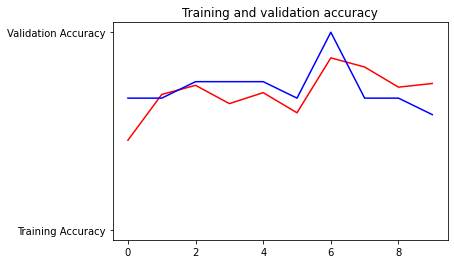

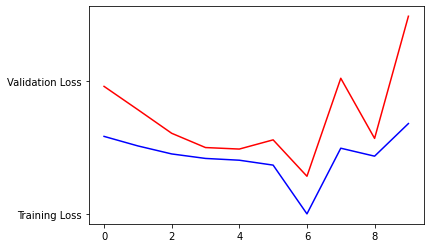

In [98]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()